## Exploratory Data Analysis

We are going to analyze the patterns of customer use , no of coupon used, popular coupons and purchase amount for some randomly generated data.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random

In [2]:
# Define a larger dataset with 20 user IDs

# List of possible site names
sites = ['kapiva.in', 'beardo.in']

# Define the dataset
data = {
    'User_ID': [i for i in range(1, 21)],
    'Site': [random.choice(sites) for _ in range(20)],
    'Coupon_Used': [],
    'Coupon_Name': [],
    'Purchase_Amount': []
}

# Generate random data for Coupon_Used, Coupon_Name, and Purchase_Amount
coupon_names = ['SUMMER20', 'FREESHIP', 'SALE50', 'WELCOME20', 'BLACKFRIDAY', 'WINTERSALE', 'SPRINGSALE', 'LOYALTY10', 'FIRSTPURCHASE', 'EXTRA15']
for _ in range(20):
    num_coupons = random.randint(1, 3)  # Random number of coupons used per user
    used_coupons = random.sample(coupon_names, num_coupons)
    data['Coupon_Used'].append(used_coupons)
    data['Coupon_Name'].append(used_coupons)
    purchase_amount = sum([random.randint(50, 300) for _ in range(num_coupons)])  # Total purchase amount for each user
    data['Purchase_Amount'].append(purchase_amount)

# Create DataFrame
df = pd.DataFrame(data)

In [3]:
# Explode the 'Coupon_Name' column to separate rows
df_new = df.explode('Coupon_Name')

# Print the DataFrame
print("DataFrame:")
print(df_new)
print()

# Summary statistics
print("Summary Statistics:")
print(df_new.describe())
print()

DataFrame:
    User_ID       Site                              Coupon_Used  \
0         1  kapiva.in        [LOYALTY10, BLACKFRIDAY, EXTRA15]   
0         1  kapiva.in        [LOYALTY10, BLACKFRIDAY, EXTRA15]   
0         1  kapiva.in        [LOYALTY10, BLACKFRIDAY, EXTRA15]   
1         2  beardo.in                    [WINTERSALE, EXTRA15]   
1         2  beardo.in                    [WINTERSALE, EXTRA15]   
2         3  beardo.in                 [EXTRA15, FIRSTPURCHASE]   
2         3  beardo.in                 [EXTRA15, FIRSTPURCHASE]   
3         4  beardo.in     [WINTERSALE, BLACKFRIDAY, WELCOME20]   
3         4  beardo.in     [WINTERSALE, BLACKFRIDAY, WELCOME20]   
3         4  beardo.in     [WINTERSALE, BLACKFRIDAY, WELCOME20]   
4         5  beardo.in                               [FREESHIP]   
5         6  kapiva.in                 [BLACKFRIDAY, LOYALTY10]   
5         6  kapiva.in                 [BLACKFRIDAY, LOYALTY10]   
6         7  kapiva.in                             

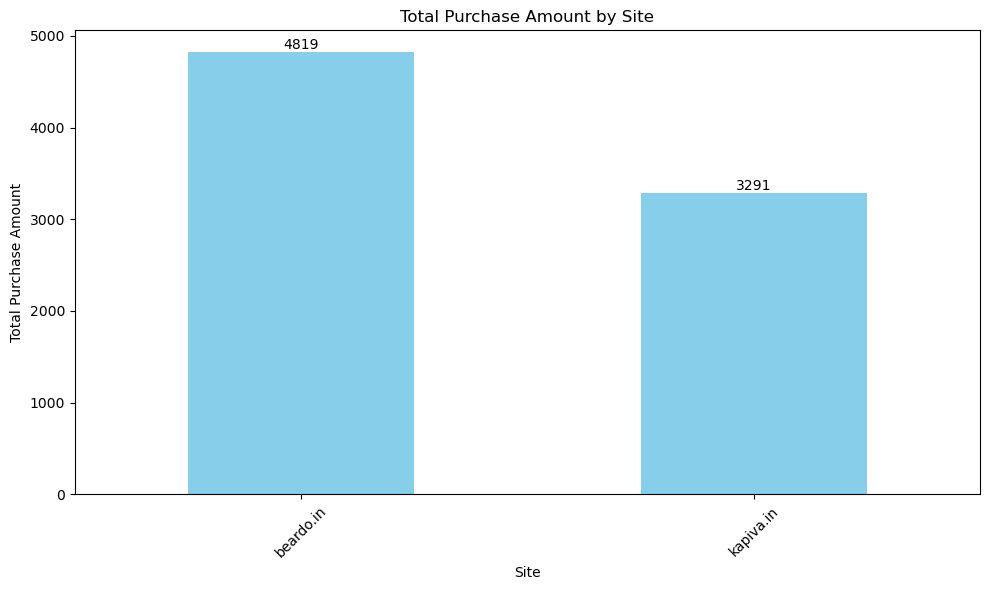

In [4]:
# Group data by site and calculate the total purchase amount for each site
site_purchase_total = df.groupby('Site')['Purchase_Amount'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = site_purchase_total.plot(kind='bar', color='skyblue')
plt.title("Total Purchase Amount by Site")
plt.xlabel("Site")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)

# Add labels on bars
for index, value in enumerate(site_purchase_total):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


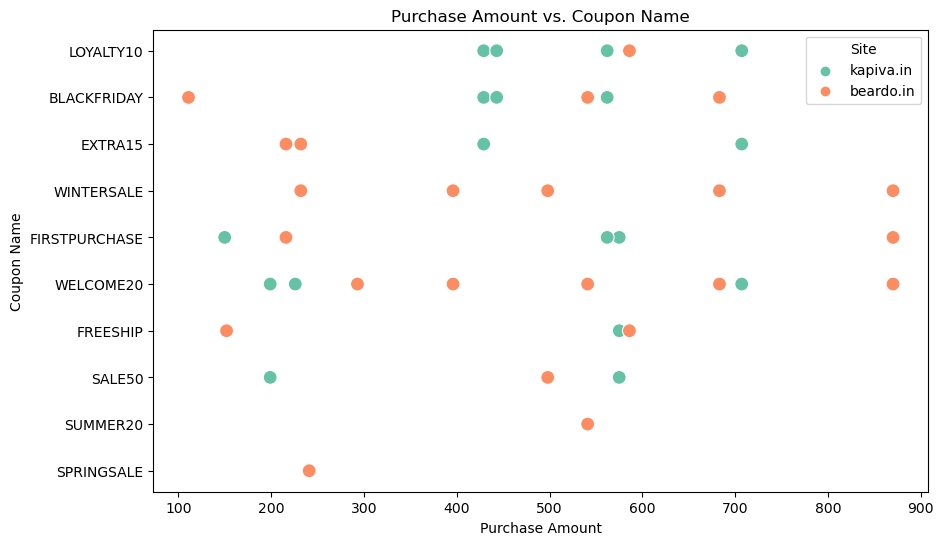

In [5]:
# Scatter plot of purchase amount vs. coupon name
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Purchase_Amount', y='Coupon_Name', hue='Site', palette='Set2', s=100)
plt.title('Purchase Amount vs. Coupon Name')
plt.xlabel('Purchase Amount')
plt.ylabel('Coupon Name')
plt.legend(title='Site')
plt.show()

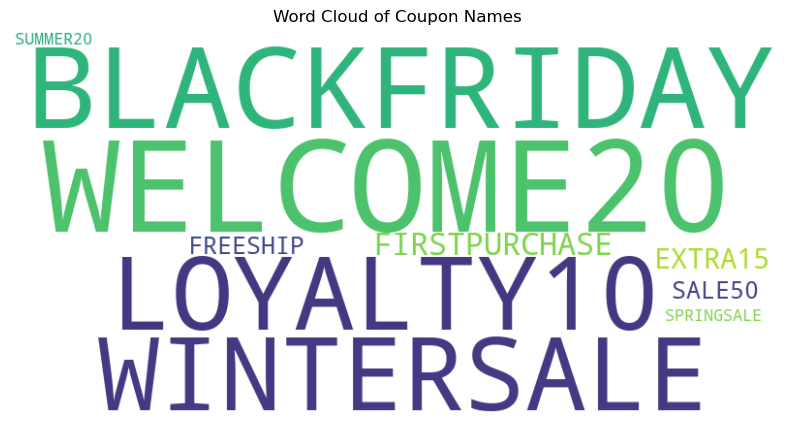

In [6]:
# Word cloud of coupon names
all_coupons = ' '.join(df_new['Coupon_Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_coupons)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Coupon Names')
plt.axis('off')
plt.show()

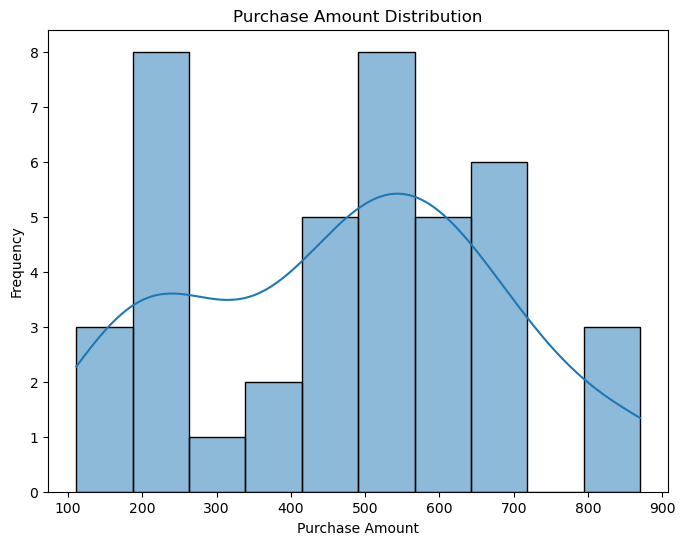

In [7]:
# Histogram of purchase amount
plt.figure(figsize=(8, 6))
sns.histplot(df_new['Purchase_Amount'], bins=10, kde=True)
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


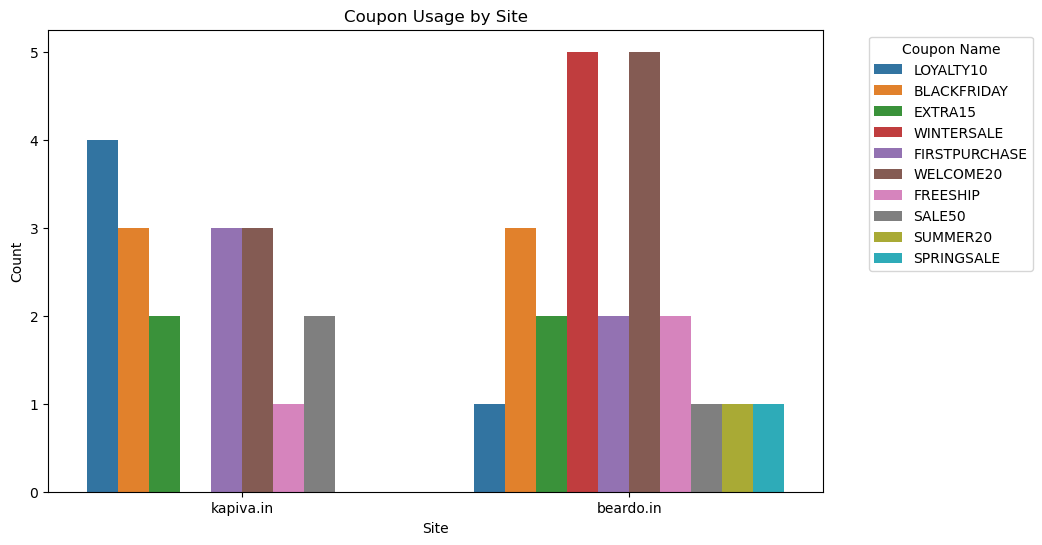

In [8]:
# Count of coupon usage by site
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='Site', hue='Coupon_Name')
plt.title("Coupon Usage by Site")
plt.xlabel("Site")
plt.ylabel("Count")
plt.legend(title="Coupon Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

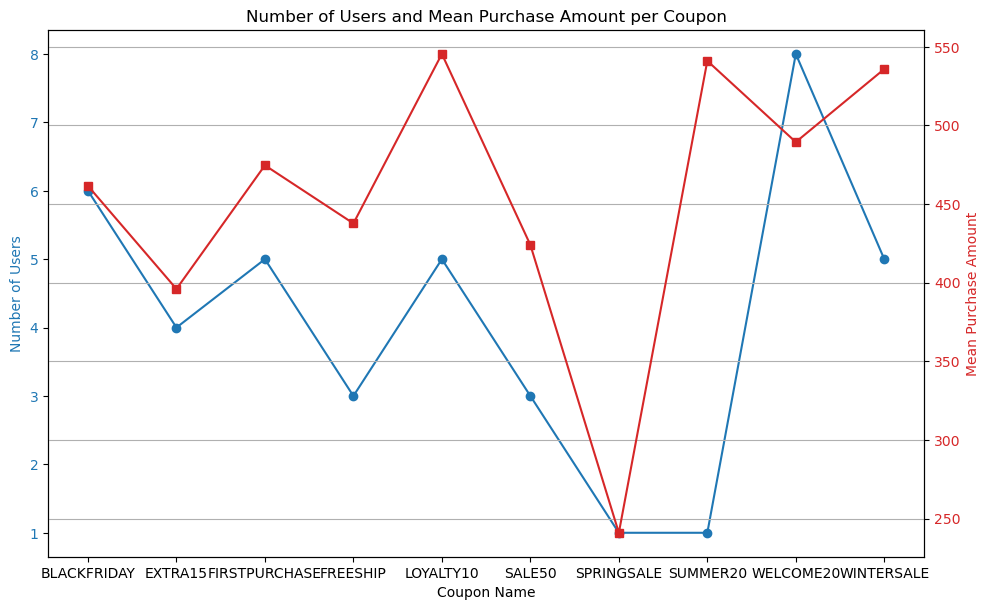

In [9]:
# Group by 'Coupon_Name' and calculate mean purchase amount and number of users
grouped_data = df_new.groupby('Coupon_Name').agg({'Purchase_Amount': 'mean', 'User_ID': 'nunique'})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of users
color = 'tab:blue'
ax1.set_xlabel('Coupon Name')
ax1.set_ylabel('Number of Users', color=color)
ax1.plot(grouped_data.index, grouped_data['User_ID'], marker='o', color=color, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for purchase amount
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Purchase Amount', color=color)
ax2.plot(grouped_data.index, grouped_data['Purchase_Amount'], marker='s', color=color, linestyle='-', label='Mean Purchase Amount')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.tight_layout()
plt.title('Number of Users and Mean Purchase Amount per Coupon')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


## Summary

1. Purchase amount of Beardo.in site is more than Kapiva.in.
   
2. BLACKFRIDAY and WELCOME20 are the most frequently used coupons.
   
3. Beardo.in has used more coupons than Kapiva.in. WINTERSALE and WELCOME20 were used frequently. 

4. SUMMER20 and SPRINGSALE were the least used coupon.